# Library_imports

In [9]:
!pip install yfinance pandas requests beautifulsoup4 plotly
!pip install html5lib
!pip install selenium
!pip install selenium webdriver-manager

# Grading Criteria Overview

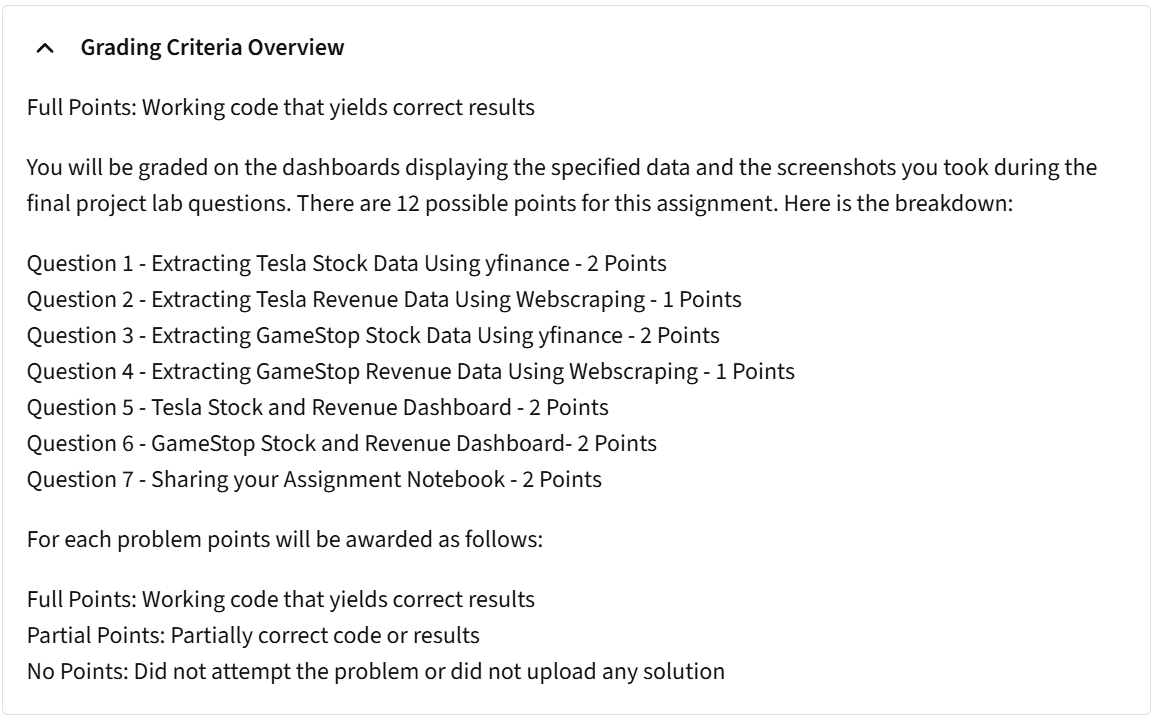

In [1]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option("display.float_format", "{:,.6f}".format)

# Question 1 - Extracting Tesla Stock Data Using yfinance

In [41]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [43]:
import pandas as pd
import requests
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(StringIO(html))

tesla_revenue = tables[1].copy()
tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({r'\$': '', ',': ''}, regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

tesla_revenue.reset_index(drop=True, inplace=True)

tesla_revenue.head()

,Date,Revenue
0,2025-06-30,22496.0
1,2025-03-31,19335.0
2,2024-12-31,25707.0
3,2024-09-30,25182.0
4,2024-06-30,25500.0


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [45]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [47]:
import pandas as pd
import requests
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(StringIO(html))

gme_revenue = tables[1].copy()
gme_revenue.columns = ["Date", "Revenue"]

gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({r'\$': '', ',': ''}, regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

gme_revenue.reset_index(drop=True, inplace=True)

gme_revenue.head()

,Date,Revenue
0,2025-04-30,732.0
1,2025-01-31,1283.0
2,2024-10-31,860.0
3,2024-07-31,798.0
4,2024-04-30,882.0


# Question 5 - Tesla Stock and Revenue Dashboard

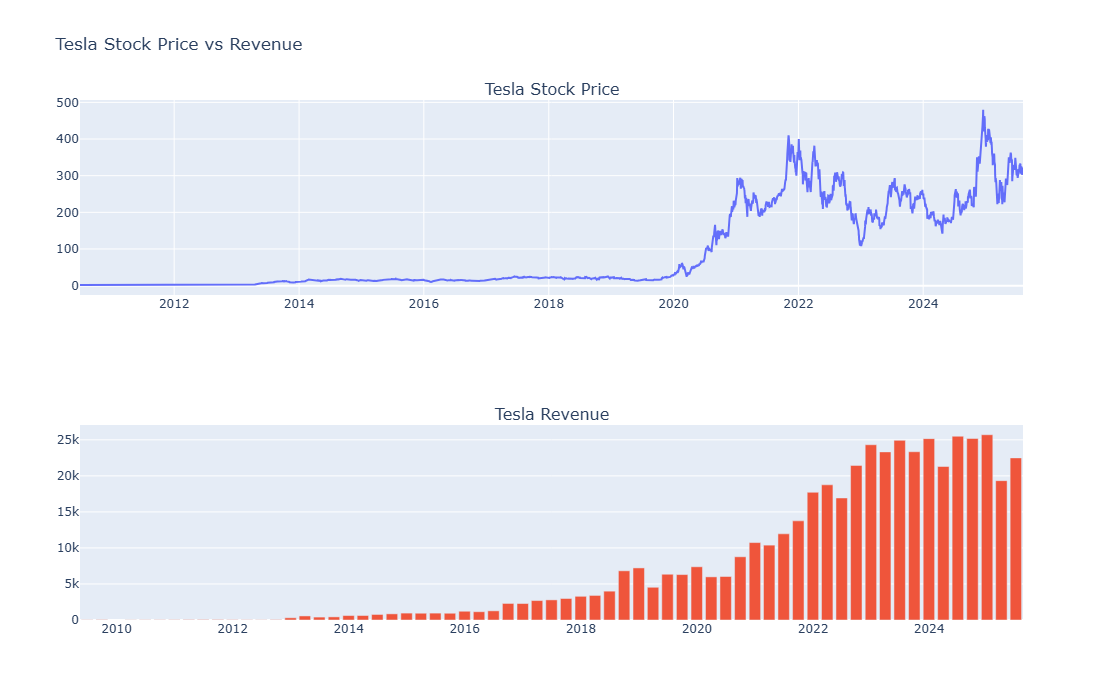

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

fig = make_subplots(rows=2, cols=1, subplot_titles=("Tesla Stock Price", "Tesla Revenue"))

fig.add_trace(go.Scatter(x=tesla_data["Date"], y=tesla_data["Close"], name="Close Price"), row=1, col=1)

fig.add_trace(go.Bar(x=tesla_revenue["Date"], y=tesla_revenue["Revenue"], name="Revenue"), row=2, col=1)

fig.update_layout(height=700, title_text="Tesla Stock Price vs Revenue", showlegend=False)
fig.show()


# Question 6 - GameStop Stock and Revenue Dashboard

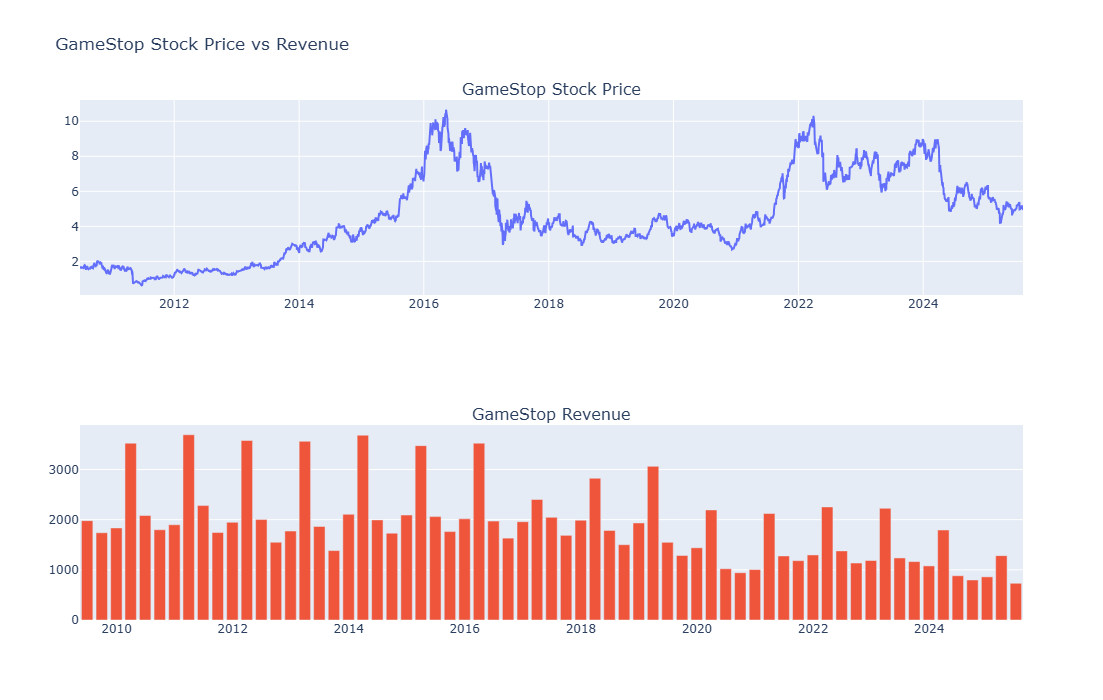

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import yfinance as yf

gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)

fig = make_subplots(rows=2, cols=1, subplot_titles=("GameStop Stock Price", "GameStop Revenue"))

fig.add_trace(go.Scatter(x=tesla_data["Date"], y=gme_data["Close"], name="Close Price"), row=1, col=1)

fig.add_trace(go.Bar(x=tesla_revenue["Date"], y=gme_revenue["Revenue"], name="Revenue"), row=2, col=1)

fig.update_layout(height=700, title_text="GameStop Stock Price vs Revenue", showlegend=False)
fig.show()